## Search and Optimisation - Assignment
### Year 2022-2023- Semester I
### CCE2503
####  developed by - Adrian Muscat, 2022
---
### Write your name, ID Card Number and class below

Jasmine Micallef, 395301L, CCE2503
---


In this assignment you will do the following:

1. Optimise the Rosenbrock function using gradient descent (from prep exercises)
1. Compute the optimal step size when using gradient descent to minimise the Rosenbrock function 
4. Compare the computational time for the two variants of gradient descent
1. Given a 5-dimensional loss function you will code coordinate descent to minimise the function.

You will be using some of the functions you had developed during the preparatory stage, e.g standard gradient descent, golden search, initial bracket search and python boiler plate code for plotting contour surfaces, 3D wireframes, timing code, etc. 

Note that not all questions are graded.


## NOTE: 

This work is to be attempted individually. It is essential that the work you eventually submit and present for your assignment consists only of your own work; use of copied material will be treated as plagiarism. Discussion is only permitted on general issues, and it is absolutely forbidden to discuss specific details with anyone and/or share results.

Please sign and attached the plagiarism form:

https://www.um.edu.mt/__data/assets/pdf_file/0009/475416/PlagiarismDeclarationForm.pdf

or at:
https://www.um.edu.mt/ict/students/forms


In [1]:
# We first load some modules
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

### [This question is not graded]
### Minimize the 2D Rosenbrock function (given below) using the standard gradient descent, i.e where $\alpha$ (step size) is constant. (Don't forget to check the solution for convergence)
### Plot the Rosenbrock function on a contour graph ($X_{min}=Y_{min}=-2, X_{max}=Y_{max}=2$)
### On the same graph plot the path taken  by the gradient descent algorithm
### To experiment, start the algorithm at four different points; $\mathbf{x_1}=[-1.5,-1.5]$, $\mathbf{x_2}=[-1.9,1.9]$, $\mathbf{x_3}=[1.9,1.9]$,  $\mathbf{x_4}=[1.9,-1.9]$

In [2]:
def rosenbrock(x, a=1, b=5):
    """
    Rosenbrock's function is a 2D uni-modal function
    This implementation follows the definition in Kochenderfer & Wheeler, 2019
    x : x is a numpy array of dimensions [2,m], where m is the number of 2D points
    """
    return (a-x[0])**2 + b*(x[1] - x[0]**2)**2

In [2]:
from numpy import *
from numpy.linalg import norm
import torch
from torch.autograd.functional import jacobian


def grad_descent(f, init_t, alpha, eps, maxiter):

    prev_t = init_t-10*eps
    t = init_t.copy()
    i = 0
        
    while norm(t - prev_t) > eps and i<maxiter:
        
        prev_t = t.copy()
        input = torch.tensor(t)
        d = jacobian(f, input)
        t -= alpha*array(d)
        i+=1
            
    return t


def grad_descent_plot(f, init_t, alpha, eps):
      
    plt.figure()
    N=80
    limit=2
    xx = np.linspace(-limit, limit, N)
    yy = np.linspace(-limit, limit, N)
    X = np.repeat(xx,N).reshape(N,N)
    Y = np.tile(yy,N).reshape(N,N)
    #
    x = np.column_stack((X.flatten(),Y.flatten())).T
    Z = rosenbrock(x).reshape(N,N)
    #
    plt.contour(X,Y,Z, levels=100)
    
    prev_t = init_t-10*eps
    t = init_t.copy()

    i=1

    while norm(t - prev_t) > eps:
        
        plt.plot(t[0],t[1],marker=".",color="r")

        prev_t = t.copy()
        t = grad_descent(f, t, alpha, eps, i)
        i+=1

[0.89799187 0.79761696]
[0.89791163 0.79746552]
[1.12235887 1.26883101]
[0.89801836 0.79766697]


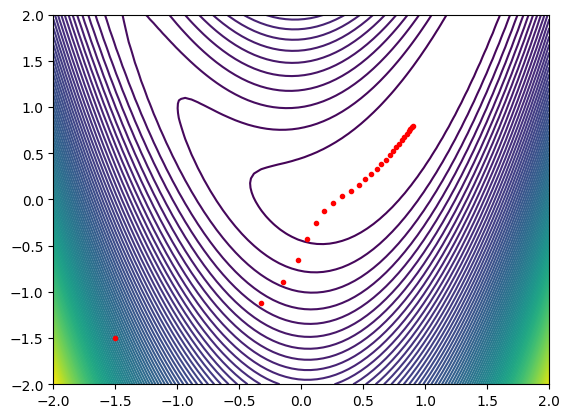

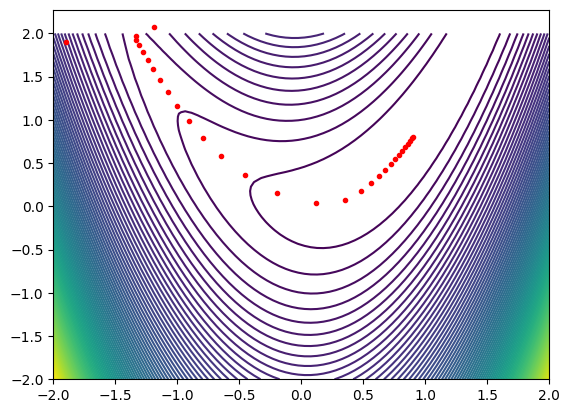

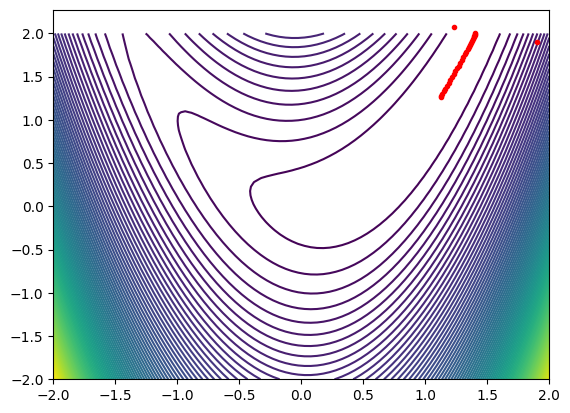

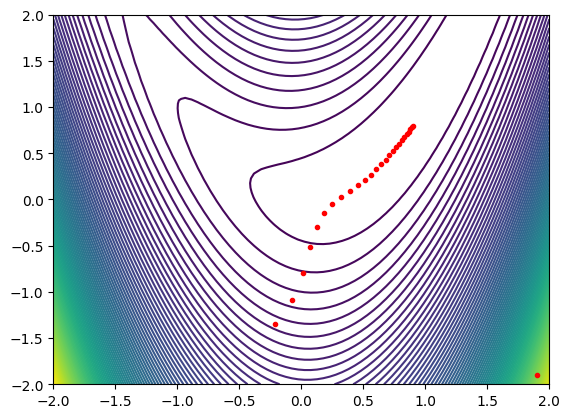

In [303]:
t = grad_descent(rosenbrock, array([-1.5,-1.5]), 0.01, 1e-3, 10000)
print(t)
grad_descent_plot(rosenbrock, array([-1.5,-1.5]), 0.01, 1e-3)

t = grad_descent(rosenbrock, array([-1.9,1.9]), 0.01, 1e-3, 10000)
print(t)
grad_descent_plot(rosenbrock, array([-1.9,1.9]), 0.01, 1e-3)

t = grad_descent(rosenbrock, array([1.9,1.9]), 0.01, 1e-3, 10000)
print(t)
grad_descent_plot(rosenbrock, array([1.9,1.9]), 0.01, 1e-3)

t = grad_descent(rosenbrock, array([1.9,-1.9]), 0.01, 1e-3, 10000)
print(t)
grad_descent_plot(rosenbrock, array([1.9,-1.9]), 0.01, 1e-3)

### The gradient descent can be  accelerated by computing the optimal step size, i.e $\alpha_{opt}$
###  $\alpha_{opt}$ is obtained by minimising the univariate function, $f(\mathbf{x}+\alpha \mathbf{d})$ over $\alpha$,  where $\mathbf{x}$ is the input vector of the loss function $f$, and $\mathbf{d}$ is the directional derivative at the point $\mathbf{x}$.
### Use the golden search technique to compute the optimal step size in the standard gradient descent  when minimizing the 2D Rosenbrock function and include in your answer a graph of the Rosenbrock function and a plot of the path taken by the gradient descent algorithm with optimal step size.
# [40 marks]




0.01477330667990833


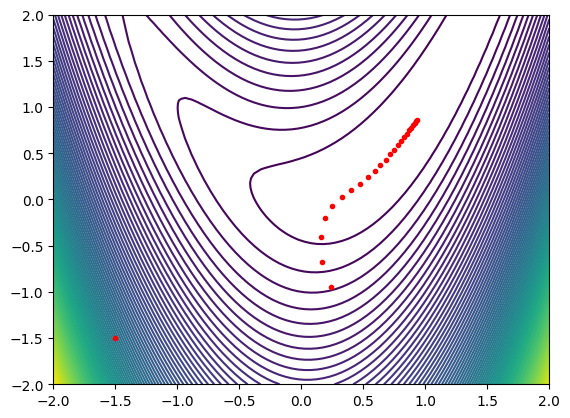

In [194]:
def get_initial_bracket(f, x=0, s=1e-2, k=2.0):
    """
    Find an interval [a,b] along a coordinate direction in which a minimum exists
    f : multivariate function where minimum exists (n-dimensional)
    x : starting position  (vector in n-dimensions)
    s : initial step size (scalar)
    k : interval expanding factor (scalar)
    returns:
    [a,b] : return scalar quantities a, b (bracket or interval limits)
    """
    a = x
    ya = f(x)
    b = a + s
    x=b
    yb = f(x) 
    if yb > ya:
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    flag=True
    while flag:
        c = b + s
        x = c
        yc = f(x)
        if yc > yb:
            flag = False
        else:
            a, ya, b, yb = b, yb, c, yc # comment this line to preserve starting point
            s *= k
    if a < c: a_b = [a, c] 
    else: a_b=[c, a]
    return a_b


def goldensearch(f,a,b,n):
    
    #f = function
    #a,b = initial interval
    #n = evaluations
    
    phi = 1.618
    ro = phi-1
    xu = ro*b+(1-ro)*a
    yu = f(xu)
    for k in range(1,n-1):
        
        x1 = ro*a+(1-ro)*b
        y1 = f(x1)
        
        if y1<yu:
            b=xu
            xu=x1
            yu=y1
        else:
            a=b
            b=x1
    return xu


def f(alpha):
    a=1
    b=5
    x = [-1.5,-1.5]
    d = -gradf(x)
    return (a-(x[0]+alpha*d[0]))**2 + b*(x[1]+alpha*d[1] - (x[0]+alpha*d[0])**2)**2

ab = get_initial_bracket(f, x=0, s=1e-2, k=2.0)

alpha = goldensearch(f,ab[0],ab[1],1000)
print(alpha)

t = grad_descent(rosenbrock, array([-1.5,-1.5]), alpha, 1e-3, 10000)
grad_descent_plot(rosenbrock, array([-1.5,-1.5]), alpha, 1e-3)



### Compare the computational time taken by the two variants of gradient descent to converge to the minimum.
### Make use of all four starting points given above.
### Comment on the results.
# [20 marks]

In [282]:
import time 

#[-1.5,-1.5]
start = time.time()
for a in range(100):
    for b in range(30000):
        pass
end = time.time()
print(end-start,"seconds - [-1.5,-1.5] - not optimized")

t = grad_descent(rosenbrock, array([-1.5,-1.5]), 0.005, 1e-3, 10000)


0.17920994758605957 seconds - [-1.5,-1.5] - not optimized


In [283]:
#[-1.5,-1.5]

def f(alpha):
    a=1
    b=5
    x = [-1.5,-1.5]
    d = -gradf(x)
    return (a-(x[0]+alpha*d[0]))**2 + b*(x[1]+alpha*d[1] - (x[0]+alpha*d[0])**2)**2

ab = get_initial_bracket(f, x=0, s=1e-2, k=2.0)

alpha = goldensearch(f,ab[0],ab[1],1000)

start = time.time()
for a in range(100):
    for b in range(30000):
        pass
end = time.time()
print(end-start,"seconds - [-1.5,-1.5] - optimized")

t = grad_descent(rosenbrock, array([-1.5,-1.5]), alpha, 1e-3, 10000)

0.15709781646728516 seconds - [-1.5,-1.5] - optimized


In [284]:
#[-1.9,1.9]
start = time.time()
for a in range(100):
    for b in range(30000):
        pass
end = time.time()
print(end-start,"seconds - [-1.9,1.9] - not optimized")

t = grad_descent(rosenbrock, array([-1.9,1.9]), 0.005, 1e-3, 10000)

0.18491601943969727 seconds - [-1.9,1.9] - not optimized


In [286]:
#[-1.9,1.9]
def f(alpha):
    a=1
    b=5
    x = [-1.9,1.9]
    d = -gradf(x)
    return (a-(x[0]+alpha*d[0]))**2 + b*(x[1]+alpha*d[1] - (x[0]+alpha*d[0])**2)**2

ab = get_initial_bracket(f, x=0, s=1e-2, k=2.0)

alpha = goldensearch(f,ab[0],ab[1],1000)

start = time.time()
for a in range(100):
    for b in range(30000):
        pass
end = time.time()
print(end-start,"seconds - [-1.9,1.9] - optimized")

t = grad_descent(rosenbrock, array([-1.9,1.9]), alpha, 1e-3, 10000)

0.17283987998962402 seconds - [-1.9,1.9] - optimized


In [287]:
#[1.9,-1.9]
start = time.time()
for a in range(100):
    for b in range(30000):
        pass
end = time.time()
print(end-start,"seconds - [1.9,-1.9] - not optimized")

t = grad_descent(rosenbrock, array([1.9,-1.9]), 0.005, 1e-3, 10000)



0.19045567512512207 seconds - [1.9,-1.9] - not optimized


In [288]:
#[1.9,-1.9]

def f(alpha):
    a=1
    b=5
    x = [1.9,-1.9]
    d = -gradf(x)
    return (a-(x[0]+alpha*d[0]))**2 + b*(x[1]+alpha*d[1] - (x[0]+alpha*d[0])**2)**2

ab = get_initial_bracket(f, x=0, s=1e-2, k=2.0)

alpha = goldensearch(f,ab[0],ab[1],1000)

start = time.time()
for a in range(100):
    for b in range(30000):
        pass
end = time.time()
print(end-start,"seconds - [1.9,-1.9] - optimized")

t = grad_descent(rosenbrock, array([1.9,-1.9]), alpha, 1e-3, 10000)

0.16229581832885742 seconds - [1.9,-1.9] - optimized


In [289]:
#[1.9,1.9]
start = time.time()
for a in range(100):
    for b in range(30000):
        pass
end = time.time()
print(end-start,"seconds - [1.9,1.9] - not optimized")

t = grad_descent(rosenbrock, array([1.9,1.9]), 0.005, 1e-3, 10000)

0.17391490936279297 seconds - [1.9,1.9] - not optimized


In [290]:
#[1.9,1.9]

def f(alpha):
    a=1
    b=5
    x = [1.9,1.9]
    d = -gradf(x)
    return (a-(x[0]+alpha*d[0]))**2 + b*(x[1]+alpha*d[1] - (x[0]+alpha*d[0])**2)**2

ab = get_initial_bracket(f, x=0, s=1e-2, k=2.0)

alpha = (f,ab[0],ab[1],1000)

start = time.time()
for a in range(100):
    for b in range(30000):
        pass
end = time.time()
print(end-start,"seconds - [1.9,1.9] - optimized")

t = grad_descent(rosenbrock, array([1.9,1.9]), alpha, 1e-3, 10000)

0.15827608108520508 seconds - [1.9,1.9] - optimized


In [ ]:
From the various computational times acheived above, it can be concluded that when using the optimal step size,
the time take to minimize the rosenbrock function using the gradient descent was reduced regardless of the 
starting point.

### Below is a specific loss function (cce2503_2022_loss_function(z)) which you are required to minimize.
### The independent variable is 5 dimensional and real valued. 
### i.e $\mathbf{z}$ is real valued and of length 5

In [302]:
def cce2503_2022_loss_function(z):
    """
    z : vector of length 5
    returns:
    scalar value of function at point z
    """
    assert z.flatten().ravel().shape[0]==5, "z is not of length 5"
    z=z.reshape(1,5)
    X,y=pickle.load(open("numbers.pck","rb"))
    p=np.matmul(z,X.T)
    e=((y.ravel()-p.ravel())**2.0).mean()
    return e

### Code the coordinate descent algorithm to minimise the loss function
### What is $\mathbf{z}$ that minimises the loss function, up to a volume of uncertainty that is equal to 1e-15?
### How many function calls are required to reach the minimum with a volume of uncertainty that is equal to 1e-15?
# [40 marks]

In [358]:
import scipy.optimize as opt

def cyclic_coordinate(f,x):
    
    e = 1e-15
    y = x + [1,1,1,1,1]
    j = 0
    k = 0
    while norm(x - y) > e:
        
        y = x
                
        for j in range(0,5):
            
            d = array([0,0,0,0,0])
            d[j] = 1       
            
            def flambda(l):
                y = f(x + l*d)
                return y

            ab = get_initial_bracket(flambda, x=0, s=1e-15, k=2.0)
            l = goldensearch(flambda,ab[0],ab[1],1000)
            x = x+l*d
            
    return x
    

In [359]:
class function_call_count:
    def __init__(self, name, count):
        self.name = name
        self.count = count

    def display_count(self): # Method to display count
        print("Function call count is ", self.count)
        
    def reset_count(self):  # Method to reset count
        self.count = 0
    
    def call_func(self,func):  # func is the function to be decorated
                               # call_func is the decorator function
        def wrapper(*args, **kwargs):
            self.count += 1  # increment count when func is called
            result = func(*args, **kwargs)
            return result
        return wrapper

In [360]:
x = [0,0,0,0,0]

p1 = function_call_count(name="cc", count=0)
func_1 = p1.call_func(cce2503_2022_loss_function)

p1.reset_count()  
z = cyclic_coordinate(func_1, array(x))
    
print('z that minimizes loss function up to volume of uncertainty of 1e-15:',z)
p1.display_count()

z that minimizes loss function up to volume of uncertainty of 1e-15: [ 0.45585619  0.10730129  0.00498802 -0.00325519  0.15251338]
Function call count is  50899
